In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [93]:
#DISNEY
#file='C:/Users/yaeld/Desktop/Semestre 2022-2/Procesos estocásticos/Datos-1802/Datos_Clase2_Feb18_2022/Datos_Clase2_Feb18_2022/stocks/dis.us.txt'

#GOOGLE
file='C:/Users/yaeld/Desktop/Semestre 2022-2/Procesos estocásticos/Datos-1802/Datos_Clase2_Feb18_2022/Datos_Clase2_Feb18_2022/stocks/goog.us.txt'

#TESLA
#file='C:/Users/yaeld/Desktop/Semestre 2022-2/Procesos estocásticos/Datos-1802/Datos_Clase2_Feb18_2022/Datos_Clase2_Feb18_2022/stocks/tsla.us.txt'

Data=pd.read_csv(file)
Delta=[]
for i in range(len(Data['<OPEN>'])):
    var=Data['<CLOSE>'][i]-Data['<OPEN>'][i]
    Delta.append(var)
Delta=np.array(Delta)


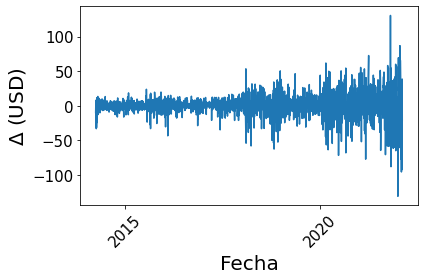

La gananacia total comprando una acción al día es de  854.4594000000052
El pago promedio por día es  0.4298085513078497
La ganancia máxima es de 15771.439400000016


In [96]:
import datetime as dt

fechas=[]

for i in range(len(Data['<DATE>'])):
    a=str(Data['<DATE>'][i])
    b=a[0:4]+"/"+a[4:6]+"/"+a[6:8]
    fechas.append(b)
    
tiempos = [dt.datetime.strptime(d,'%Y/%m/%d').date() for d in fechas]

#GANANCIAS MÁXIMAS DE UN INVERSIONISTA (JUEGO SIMPLIFICADO)

import matplotlib.dates as mdates

inv=1 #En dólares
Ganancia_maxima=0.
for i in range(len(Delta)-100):
    if Delta[i+100]>0:
        Ganancia_maxima+=Delta[i+100]
    elif Delta[i]<0:
        Ganancia_maxima+=-Delta[i+100]
        
Delta=np.array(Delta)

plt.plot(tiempos,Delta)
plt.tick_params(axis='x', labelrotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))
#plt.title('Ganancias diarias Google')
plt.xlabel('Fecha',fontsize=20)
plt.ylabel('$\Delta$ (USD)',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
#plt.savefig("DisneyPagos.jpg",dpi=600)
plt.show()

Uniforme=np.zeros([100])
for i in range(100):
    Uniforme[i]=np.sum(Delta)

print('La gananacia total comprando una acción al día es de ',sum(Delta))
print('El pago promedio por día es ',sum(Delta)/len(Delta))
print('La ganancia máxima es de',Ganancia_maxima)

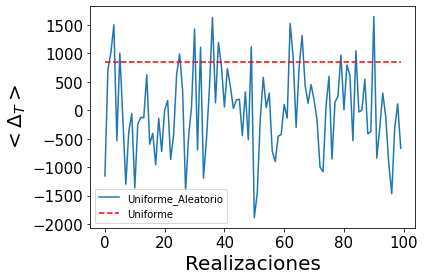

La ganancia promedio es de  2.8030860000002282
La desviación estándar es de  764.780655610656


In [97]:
#PRIMERA ESTRATEGIA: INVERSIONISTA ALEATORIO

#Probabilidad de comprar
p1=1/2
#Probabilidad de vender
p2=1/2
#Cantidad a invertir
inv=1
# Número de realizaciones
puntos=100

Dist=[]
for j in range(puntos):
    Ganancia=0.
    for i in range(len(Delta)-100):
        Payoff=Delta[i+100]*inv
        x=np.random.random()
        if x<=p1:
            Ganancia+=Payoff
        elif x>p1:
            Ganancia+=-Payoff
    Dist.append(Ganancia)
    
        
plt.plot(Dist,label='Uniforme_Aleatorio')
plt.plot(Uniforme,'r--',label='Uniforme')
plt.legend()
plt.xlabel('Realizaciones',fontsize=20)
plt.ylabel(r'$<\Delta_T>$',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
#plt.savefig('DisneyAleatorio.jpg',dpi=600)
plt.show()

print('La ganancia promedio es de ',np.mean(Dist))
print('La desviación estándar es de ',np.std(Dist))

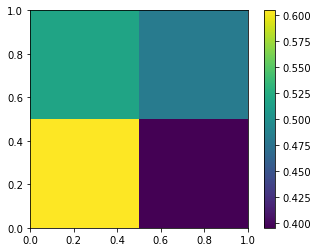

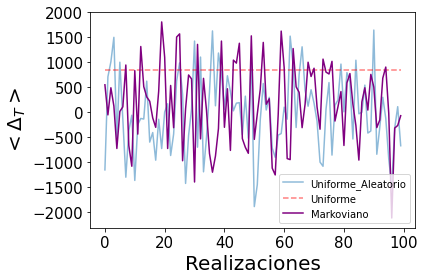

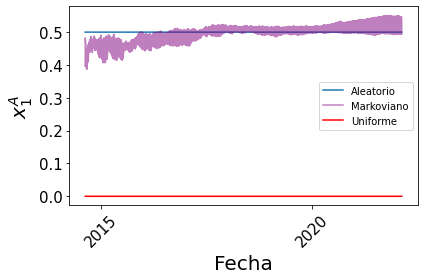

La ganancia promedio es de  175.2330139999996
La desviación estándar es de  790.624848946442


In [98]:
#SEGUNDA ESTRATEGIA: INVERSIONSITA MARKOVIANO

init=100
Trr=0.
Trv=0.
Tvr=0.
Tvv=0.
for i in range(1,init):
    j+=1
    if Delta[i-1]<0:
        if Delta[i]<0:
            Trr+=1
        else:
            Trv+=1
    else:
        if Delta[i]>0:
            Tvv+=1
        else:
            Tvr+=1
            
W=np.zeros([2,2])
W[0,0]=Trr/(Trr+Trv)
W[0,1]=Trv/(Trr+Trv)
W[1,0]=Tvr/(Tvr+Tvv)
W[1,1]=Tvv/(Tvr+Tvv)

plt.imshow(W,extent=[0,1,0,1])
plt.colorbar()
#plt.savefig('DisneyMarkov_imshow.jpg',dpi=600)
plt.show()

DistMark=[]
puntos=100
for j in range(puntos):
    X=[]
    a=Trr
    b=Trv
    c=Tvr
    d=Tvv
    Ganancia=0.
    inv=1.
    for i in range(len(Delta)-init-1):
        x=np.random.random()
        if Delta[i+init]<0:
            p=b/(a+b)
            if x<p:
                Ganancia+=Delta[i+init+1]
            else:
                Ganancia+=-Delta[i+init+1]
            if Delta[i+init+1]<0:
                a+=1
            else:
                b+=1
        else:
            p=d/(d+c)
            if x<p:
                Ganancia+=Delta[i+init+1]*inv
            else:
                Ganancia+=-Delta[i+init+1]*inv
            if Delta[i+init+1]>0:
                d+=1
            else:
                c+=1
        X.append(p)
    DistMark.append(Ganancia)
    
plt.plot(Dist,alpha=0.5,label='Uniforme_Aleatorio')
plt.plot(Uniforme,'r--',alpha=0.5,label='Uniforme')
plt.plot(DistMark,'purple',label='Markoviano')
plt.legend()
plt.xlabel('Realizaciones',fontsize=20)
plt.ylabel(r'$<\Delta_T>$',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
#plt.savefig('DisneyMarkoviano.jpg',dpi=600)
plt.show()

Unos=np.zeros([len(X)])
Medios=np.zeros([len(X)])
Unos[:]=0.
Medios[:]=0.5
plt.plot(tiempos[101:len(Delta)],Medios,label='Aleatorio')
plt.plot(tiempos[101:len(Delta)],X,'purple',alpha=0.5,label='Markoviano')
plt.plot(tiempos[101:len(Delta)],Unos,'r',label='Uniforme')
plt.tick_params(axis='x', labelrotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))
plt.legend()
plt.xlabel('Fecha',fontsize=20)
plt.ylabel(r'$x_1^A$',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
#plt.savefig('Disney_EstMark.jpg',dpi=600)
plt.show()
    
print('La ganancia promedio es de ',np.mean(DistMark))
print('La desviación estándar es de ',np.std(DistMark))

In [99]:
# DEFINICIÓN DE FUNCIÓN SATO-CRUTCHFIELD

def SC(Gamma,alpha,A,Q_old,xA_old,xB):
    Q_new=[]
    xA_new=[]
    for i in range(len(xA_old)):
        suma=0.
        for j in range(len(xB)):
            suma=suma+A[i,j]*xB[j]
        Q_new.append((1-alpha)*Q_old[i]+suma)
    Q_new=np.array(Q_new)
    sumaA=0.
    for i in range(len(Q_new)):
        sumaA+=np.exp(Gamma*Q_new[i])
    for i in range(len(xA_old)):
        xA_new.append(np.exp(Gamma*Q_new[i])/sumaA)
    xA_new=np.array(xA_new)
    return Q_new,xA_new

La ganancia promedio es de  1571.5474820000009
La desviación estándar es de  500.7045621710925


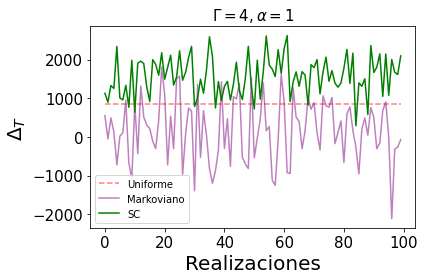

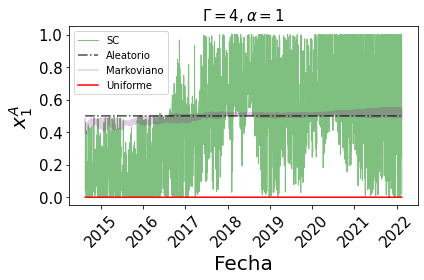

In [106]:
#Cálculadora de curvas

init=100
Trr=0.
Trv=0.
Tvr=0.
Tvv=0.
for i in range(1,init):
    j+=1
    if Delta[i-1]<0:
        if Delta[i]<0:
            Trr+=1
        else:
            Trv+=1
    else:
        if Delta[i]>0:
            Tvv+=1
        else:
            Tvr+=1
            

DistSC=[]
puntos=100
Gamma=4
alpha=1.

for j in range(puntos):
    a=Trr
    b=Trv
    c=Tvr
    d=Tvv
    Ganancia=0.
    xA=np.array([.5,.5])
    QA=np.array([0.,0.])
    init=100
    cont=init
    xB=np.zeros([2])
    XSC=[]
    for i in range(len(Delta)-init-1):
        o=np.abs(Delta[i+init])
        A=np.array([[o,-o],[-o,o]])
        if Delta[i+init]>0:
            xB[0]=d/(c+d)
            xB[1]=c/(c+d)
        else:
            xB[0]=b/(a+b)
            xB[1]=a/(a+b)
        QA,xA=SC(Gamma,alpha,A,QA,xA,xB)
        x=np.random.random()
        Payoff=Delta[i+init+1]
        XSC.append(xA[0])
        if x<=xA[0]:
            Ganancia+=Payoff
        else:
            Ganancia+=-Payoff
        if Delta[i+init]<0:
            if Delta[i+init+1]<0:
                a+=1
            else:
                b+=1
        else:
            if Delta[i+init+1]>0:
                d+=1
            else:
                c+=1
        
    DistSC.append(Ganancia)

DistSC=np.array(DistSC)
print('La ganancia promedio es de ',np.mean(DistSC))
print('La desviación estándar es de ',np.std(DistSC))

#plt.plot(Dist,alpha=0.5,label='Uniforme_Aleatorio')
plt.plot(Uniforme,'r--',alpha=0.5,label='Uniforme')
plt.plot(DistMark,'purple',alpha=0.5,label='Markoviano')
plt.plot(DistSC,'green',label='SC')
plt.title(r'$\Gamma=4, \alpha=1$',fontsize=15)
plt.legend()
plt.xlabel('Realizaciones',fontsize=20)
plt.ylabel(r'$\Delta_T$',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.savefig('Google_Optimo.jpg',dpi=600)
plt.show()

plt.plot(tiempos[101:len(Delta)],XSC,'g',linewidth=1,alpha=0.5,label='SC')
plt.plot(tiempos[101:len(Delta)],Medios,'k-.',alpha=0.7,label='Aleatorio')
plt.plot(tiempos[101:len(Delta)],X,'purple',alpha=0.2,label='Markoviano')
plt.plot(tiempos[101:len(Delta)],Unos,'r',label='Uniforme')
plt.title(r'$\Gamma=4, \alpha=1$',fontsize=15)
plt.tick_params(axis='x', labelrotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))
plt.legend()
plt.xlabel('Fecha',fontsize=20)
plt.ylabel(r'$x_1^A$',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.savefig('Google_EstOptimo.jpg',dpi=600)
plt.show()

C:\Users\yaeld\AppData\Local\Temp/ipykernel_11160/3172393714.py:14: RuntimeWarning: overflow encountered in exp
  sumaA+=np.exp(Gamma*Q_new[i])
C:\Users\yaeld\AppData\Local\Temp/ipykernel_11160/3172393714.py:16: RuntimeWarning: overflow encountered in exp
  xA_new.append(np.exp(Gamma*Q_new[i])/sumaA)
C:\Users\yaeld\AppData\Local\Temp/ipykernel_11160/3172393714.py:16: RuntimeWarning: invalid value encountered in double_scalars
  xA_new.append(np.exp(Gamma*Q_new[i])/sumaA)


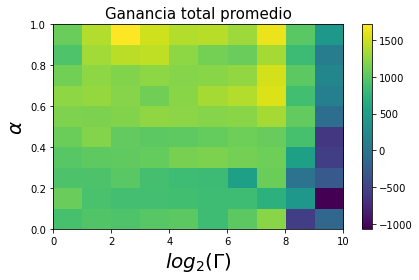

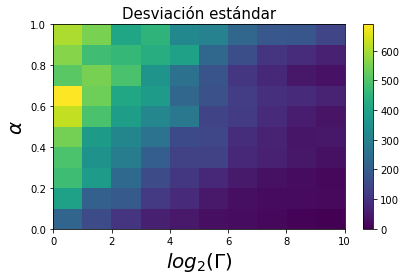

In [102]:
# Barrido largo

puntos=50
num_alpha=10
num_Gamma=10

init=100
Trr=0.
Trv=0.
Tvr=0.
Tvv=0.
for i in range(1,init):
    j+=1
    if Delta[i-1]<0:
        if Delta[i]<0:
            Trr+=1
        else:
            Trv+=1
    else:
        if Delta[i]>0:
            Tvv+=1
        else:
            Tvr+=1

Promedios=np.zeros([num_alpha,num_Gamma])
Desviaciones=np.zeros([num_alpha,num_Gamma])
for l in range (num_alpha):
    alpha=(l+1)/(num_alpha)
    for k in range (num_Gamma):
        Gamma=2**(k)
        DistSC=[]
        for j in range(puntos):
            a=Trr
            b=Trv
            c=Tvr
            d=Tvv
            Ganancia=0.
            xA=np.array([.5,.5])
            QA=np.array([0.,0.])
            init=100
            cont=init
            xB=np.zeros([2])
            for i in range(len(Delta)-init-1):
                o=np.abs(Delta[i+init])
                A=np.array([[o,-o],[-o,o]])
                if Delta[i+init]>0:
                    xB[0]=d/(c+d)
                    xB[1]=c/(c+d)
                else:
                    xB[0]=b/(a+b)
                    xB[1]=a/(a+b)
                QA,xA=SC(Gamma,alpha,A,QA,xA,xB)
                x=np.random.random()
                Payoff=Delta[i+init+1]*inv
                if x<=xA[0]:
                    Ganancia+=Payoff
                else:
                    Ganancia+=-Payoff
                if Delta[i+init]<0:
                    if Delta[i+init+1]<0:
                        a+=1
                    else:
                        b+=1
                else:
                    if Delta[i+init+1]>0:
                        d+=1
                    else:
                        c+=1

            DistSC.append(Ganancia)
        Promedios[l,k]=np.mean(DistSC)
        Desviaciones[l,k]=np.std(DistSC)


plt.imshow(Promedios,origin='lower',aspect='auto',extent=[0,num_Gamma,0,1])
plt.title('Ganancia total promedio',fontsize=15)
plt.xlabel(r'$log_{2}(\Gamma)$',fontsize=20)
plt.ylabel(r'$\alpha$',fontsize=20)
plt.colorbar()
plt.tight_layout()
plt.savefig('GoogleBarrido_Largo_Promedio',dpi=600)
plt.show()

plt.imshow(Desviaciones,origin='lower',aspect='auto',extent=[0,num_Gamma,0,1])
plt.title('Desviación estándar',fontsize=15)
plt.xlabel(r'$log_{2}(\Gamma)$',fontsize=20)
plt.ylabel(r'$\alpha$',fontsize=20)
plt.colorbar()
plt.tight_layout()
plt.savefig('GoogleBarrido_Largo_Desv',dpi=600)
plt.show()


In [36]:
print(Promedios[1,0])
print(Desviaciones[1,0])

61.252225999999844
23.177471628384406


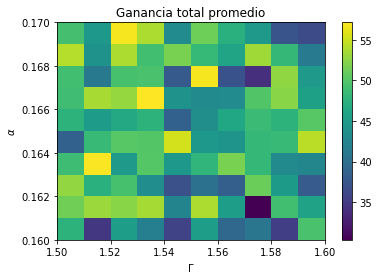

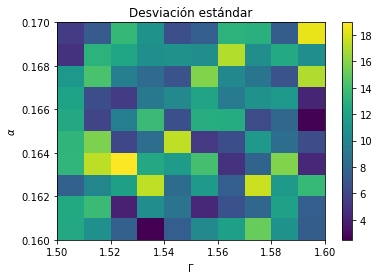

In [57]:
# Barrido Fino

inv=1
puntos=5
num_alpha=10
num_Gamma=10

init=100
Trr=0.
Trv=0.
Tvr=0.
Tvv=0.
for i in range(1,init):
    j+=1
    if Delta[i-1]<0:
        if Delta[i]<0:
            Trr+=1
        else:
            Trv+=1
    else:
        if Delta[i]>0:
            Tvv+=1
        else:
            Tvr+=1

Promedios=np.zeros([num_alpha,num_Gamma])
Desviaciones=np.zeros([num_alpha,num_Gamma])
for l in range (num_alpha):
    alpha=.15+(l+1)*.01/(num_alpha)
    for k in range (num_Gamma):
        Gamma=1.5+(k+1)*.1/num_Gamma
        DistSC=[]
        for j in range(puntos):
            a=Trr
            b=Trv
            c=Tvr
            d=Tvv
            Ganancia=0.
            xA=np.array([.5,.5])
            QA=np.array([0.,0.])
            subio=0.
            init=100
            cont=init
            for i in range(init):
                if Delta[i]>0:
                    subio=subio+1
            xB=np.array([subio/init,1-subio/init])
            for i in range(len(Delta)-init-1):
                b=np.abs(Delta[i+init]*inv)
                A=np.array([[b,-b],[-b,b]])
                if Delta[i+init]>0:
                    xB[0]=d/(c+d)
                    xB[1]=c/(c+d)
                else:
                    xB[0]=b/(a+b)
                    xB[1]=a/(a+b)
                QA,xA=SC(Gamma,alpha,A,QA,xA,xB)
                x=np.random.random()
                Payoff=Delta[i+init+1]*inv
                if x<=xA[0]:
                    Ganancia+=Payoff
                else:
                    Ganancia+=-Payoff
                if Delta[i+init]<0:
                    if Delta[i+init+1]<0:
                        a+=1
                    else:
                        b+=1
                else:
                    if Delta[i+init+1]>0:
                        d+=1
                    else:
                        c+=1

            DistSC.append(Ganancia)
        Promedios[l,k]=np.mean(DistSC)
        Desviaciones[l,k]=np.std(DistSC)


plt.imshow(Promedios,origin='lower',aspect='auto',extent=[1.5,1.6,.16,.17])
plt.title('Ganancia total promedio')
plt.xlabel(r'$\Gamma$')
plt.ylabel(r'$\alpha$')
plt.colorbar()
#plt.savefig('Barrido_Corto_Promedio')
plt.show()

plt.imshow(Desviaciones,origin='lower',aspect='auto',extent=[1.5,1.6,.16,.17])
plt.title('Desviación estándar')
plt.xlabel(r'$\Gamma$')
plt.ylabel(r'$\alpha$')
plt.colorbar()
#plt.savefig('Barrido_Corto_Desv')
plt.show()


In [50]:
print(Promedios[5,4])
print(Desviaciones[5,4])

62.37247199999994
6.795694794778243
